# A very hard classification problem
by: _Andrés M. Castillo_

*Universidad del Valle*

This notebook aims to practice the most common preprocessing steps that you must carry previously to build a classification model. We found the dataset in Kaggle(https://www.kaggle.com/sayeera/classification). It does not have any description or discussion opened at the time I have written this. 

This practice aims to create fancy and meaningful charts that help in the data understanding process. As you must remember, this is one of the critical steps in the data mining process.

The second part of the practice is to create a classification model that predicts or explains the job satisfaction of a company's employees, based on the related information available in this dataset. 

To accomplish the challenge, the student must provide a very detailed and fancy description of the variables depending on its type, and some analysis for each variable against the target variable "jobSatisfaction". Use histograms, pie charts, scatter plots, boxplots, violins plots depending on what is more appropriate. 
<img src="visu.jpeg" alt="visualization" style="width: 600px;"/>

We start importing the needed libraries. 

In [1]:
# Descomentar en caso de No tener instaladas las librerias
#!conda install -c conda-forge ipywidgets -y
#!conda install -c anaconda graphviz python-graphviz -y
#!conda install -c conda-forge keras -y
#!conda install -c anaconda pydot -y
#!conda install -c anaconda seaborn -y

# importando el modulo numpy
import numpy as np

# importando el modulo pandas
import pandas as pd

# importando el modulo de expresiones regulares
import re

# importando el modulo matplotlib
import matplotlib.pyplot as plt

# importando el modulo sns de seaborn
import seaborn as sns

## Pandas

Pandas is a potent toolset for data manipulations. It is very convenient to start smashing data in python. The main feature provided by Pandas is the data frame structure. You use pandas during all this course. For that reason, please get familiar with the tool:  (https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html)

## Open the dataset

Each time we open a dataset file, it is good to print the column names and size of the dataset. Just to be have a first glance at the dataset.

In [2]:
data=pd.read_csv("./data/Classification.csv")
print(data.columns)
print(data.shape)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1470, 33)


Then, it will be good to print some lines to see how the data looks like. This can be done using the data frame function ``data.head(num_lines).``

**Assignment 01**

Print the first 10 lines of the dataset

In [3]:
pd.set_option('display.max_columns', None) # Force to "print" all columns
# START CODE HERE
data.head(10) # Display the first 10 rows of the data
# END CODE HERE

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


Using this table, you must try to determine the data type of each column. Note that by default, the columns only have 2 types: Numerical, and String. You can see the type using the ``type(variable)`` function.

You can access the columns of pandas data frame using the static or the dynamic way:
* `data.column_name`: Static form
* `data['column_name']`: Dynamic form

And you can access the elements of a list or array using the brakets notation: 
```
foo = [7, 3, -14]
foo[1]
```

In [26]:
print(type(data.Age[0]))   # Print the type of the Age variable. 
print(type(data['Attrition'][0]))  # Print the type of the Attrition variable

<class 'numpy.int64'>
<class 'str'>


**Assignment 2**

Store in a python list([]), all the types for each column and print it

**Hint**

* In python you can traverse any iterable object using the "for" "in" syntax. For example to print all the elements of a given list you simply do:

```
for value in [1, 6, 3, 7]:
    print(value)
```

* Remember that you got the column names previously
* You can access any column in a dataframe using its name: data['A'] 

In [4]:
types = []
# START CODE HERE
for column in data:
    types.append(type(data[column][0]))
# END CODE HERE
print(types)

[<class 'numpy.int64'>, <class 'str'>, <class 'str'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>]


**Expected output**
```cpp
[<class 'numpy.int64'>, <class 'str'>, <class 'str'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.bool_'>]
```

## Data types for Data Mining

It is important to know, that the former classification for the previous data into integers and strings is not really appropiated for most of the data mining techniques.

So now, you must use your previous knowledge about data types and your capacity to undestand data, in order to classify each attribute in one of the following classes:
* categorical data, or factors
* Ordinal data, or levels
* ratios, or numerical data
* intervals. Another kind of numerical data, without an absolute 0
* text. Used for long strings containing descriptions, or any text not representing a category

## Group the attributes depending on its type

**Assignment 03**

Create three groups of attributes: real/numerical, ordinal, and categorical. In some cases, you will need to create a 4th group for all the text columns. 

Check: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [5]:
# START CODE HERE
numericColumns = ["Age", "HourlyRate", "DailyRate", "DistanceFromHome", "HourlyRate", 
                  "MonthlyIncome", "MonthlyRate", "PercentSalaryHike",  "TotalWorkingYears",
                  "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", 
                  "YearsSinceLastPromotion", "YearsWithCurrManager"]
factorColumns = ["Attrition", "Department", "BusinessTravel", "EducationField", "Gender", "JobRole", "OverTime"]
levelColumns = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", 
                "NumCompaniesWorked", "PerformanceRating", "RelationshipSatisfaction", 
                "StockOptionLevel", "WorkLifeBalance"]
# END CODE HERE
target = "JobSatisfaction"

Now, we are going to convert each attribute to its corresponding data type using functions defined by pandas.
In the following cell, we will convert the data as follows: 
* Attributes contained in the `numericColumns` to pd.to_numeric. This is not really necesary in Python but is better to be as explicit as you can.
* Attributes contained in the `factorColumns` to unordered [CategoricalDtype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.CategoricalDtype.html) 
* Attributes contained in the `levelColumns` to ordered CategoricalDtype 

In [6]:
from pandas.api.types import CategoricalDtype

# Convert to numeric attributes
# Nothing to do in python. Numeric is the dafault
for col in numericColumns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
# loop to change each column to category type
for col in factorColumns:
    cat_type = CategoricalDtype(categories = None, ordered = False)
    data[col] = data[col].astype(dtype = cat_type)

# Conver to levels / Ordinals
for col in levelColumns:
    cat_type = CategoricalDtype(categories = None, ordered = True)
    data[col] = data[col].astype(dtype = cat_type)

Print attributes 'Attrition' and 'Education'. Note the difference in the printing of both columns. Interpret the diference.

In [30]:
data["Attrition"]

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: category
Categories (2, object): [No, Yes]

In [31]:
data["Education"]

0       2
1       1
2       2
3       4
4       1
       ..
1465    2
1466    1
1467    3
1468    3
1469    3
Name: Education, Length: 1470, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

## Manipulating the data frame

**Assignment 04**
1. Create a new binary attribute for JobSatisfaction. This value will be True if JobSatisfaction is higher than 2 and False in other case.
2. Use the EmployeeNumber as the row name for the data frame. 
3. Once you did step 2, delete the attribute EmployeeNumber

In [7]:
# Add a new attribute to try a binary class classification first. 
# It must be categorical. But booleans are actually categoricals

# START CODE HERE
data['class'] = data[target] > 2

# Assign to the index the corresponding column
data.index = data['EmployeeNumber'].values

# Delete the "EmployeeCount" and "EmployeeNumber" column from the dataframe
data = data.drop('EmployeeCount', axis=1)
data = data.drop('EmployeeNumber', axis=1)

# END CODE HERE

# Understanding our data

Numerical data is the prefered data type for most of the data mining techniques. For that reason, Pandas comes with a builtin function to resume numerical data. Use the `data.describe()` to obtain a table with an statistical resume of your numerical data 

In [33]:
data.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,2.728571,6502.931293,14313.103401,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,1.102846,4707.956783,7117.786044,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2.000000,2911.000000,8047.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,3.000000,4919.000000,14235.500000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,4.000000,8379.000000,20461.500000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,4.000000,19999.000000,26999.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


But that is not the only way to undestand the data. Lets see what can be done in Python, using the **matplotlib** and **pandas**. In the following cell, we will create 2 pie charts to resume the `JobSatisfaction` attribute

Text(0.5, 1.0, 'Job satisfaction at 2 levels')

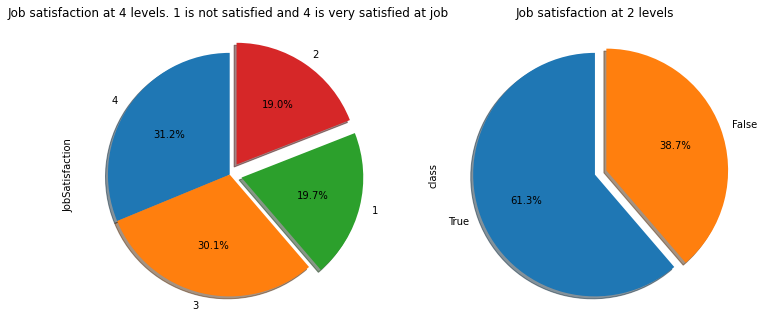

In [8]:
# declarando un objeto tipo Figura para desarrollar los subplots
fig = plt.figure(figsize=(20, 10))



ax = fig.add_subplot(1,2,1)
data['JobSatisfaction'].value_counts().plot(kind='pie', 
                                            figsize=(12, 10),
                                            autopct='%1.1f%%', # add in percentages
                                            startangle=90,     # start angle 90° (Africa)
                                            shadow=True,       # add shadow  
                                            explode=[0, 0, 0.1, 0.1] 
                                            )
plt.title('Job satisfaction at 4 levels. 1 is not satisfied and 4 is very satisfied at job ')


ax = fig.add_subplot(1,2,2)
data['class'].value_counts().plot(kind='pie', 
                                            figsize=(12, 10),
                                            autopct='%1.1f%%', # add in percentages
                                            startangle=90,     # start angle 90° (Africa)
                                            shadow=True,       # add shadow   
                                            explode=[0, 0.1] 
                                            )
plt.title('Job satisfaction at 2 levels')


### Distribution of numerical attributes. Let's use a histrogram

To better undestand numerical data we can use histograms. Let's see a example:

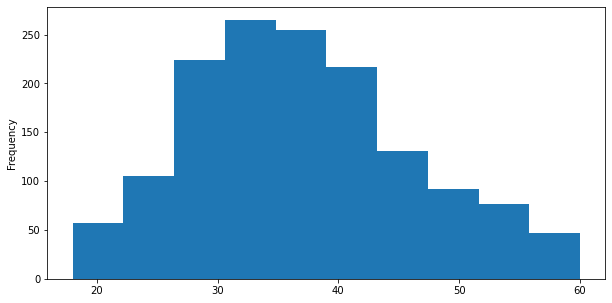

In [9]:
fig = plt.figure(figsize=(10, 5))
data['Age'].plot(kind='hist', rwidth=1)
plt.show()

**Assignment 05**
Print a histogram for each numeric column in out dataset

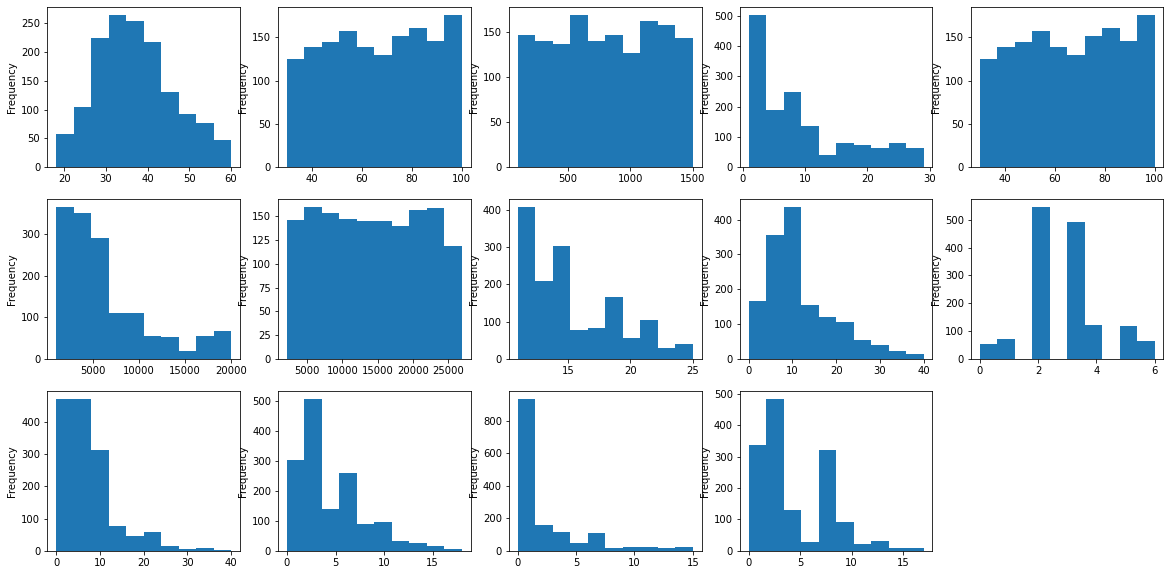

In [14]:
# declarando un objeto tipo Figura para desarrollar los subplots
fig = plt.figure(figsize=(20, 10))

x = 1
# Declarando las graficas de tipo Histograma Variables Númericas
# START CODE HERE
for numAtt in numericColumns:
    ax = fig.add_subplot(3,5,x)
    data[numAtt].plot(kind='hist', ax=ax, rwidth=1)
    x = x + 1
# END CODE HERE

### Distribution of categorical and ordinal attributes. 

Let's use pie charts for both

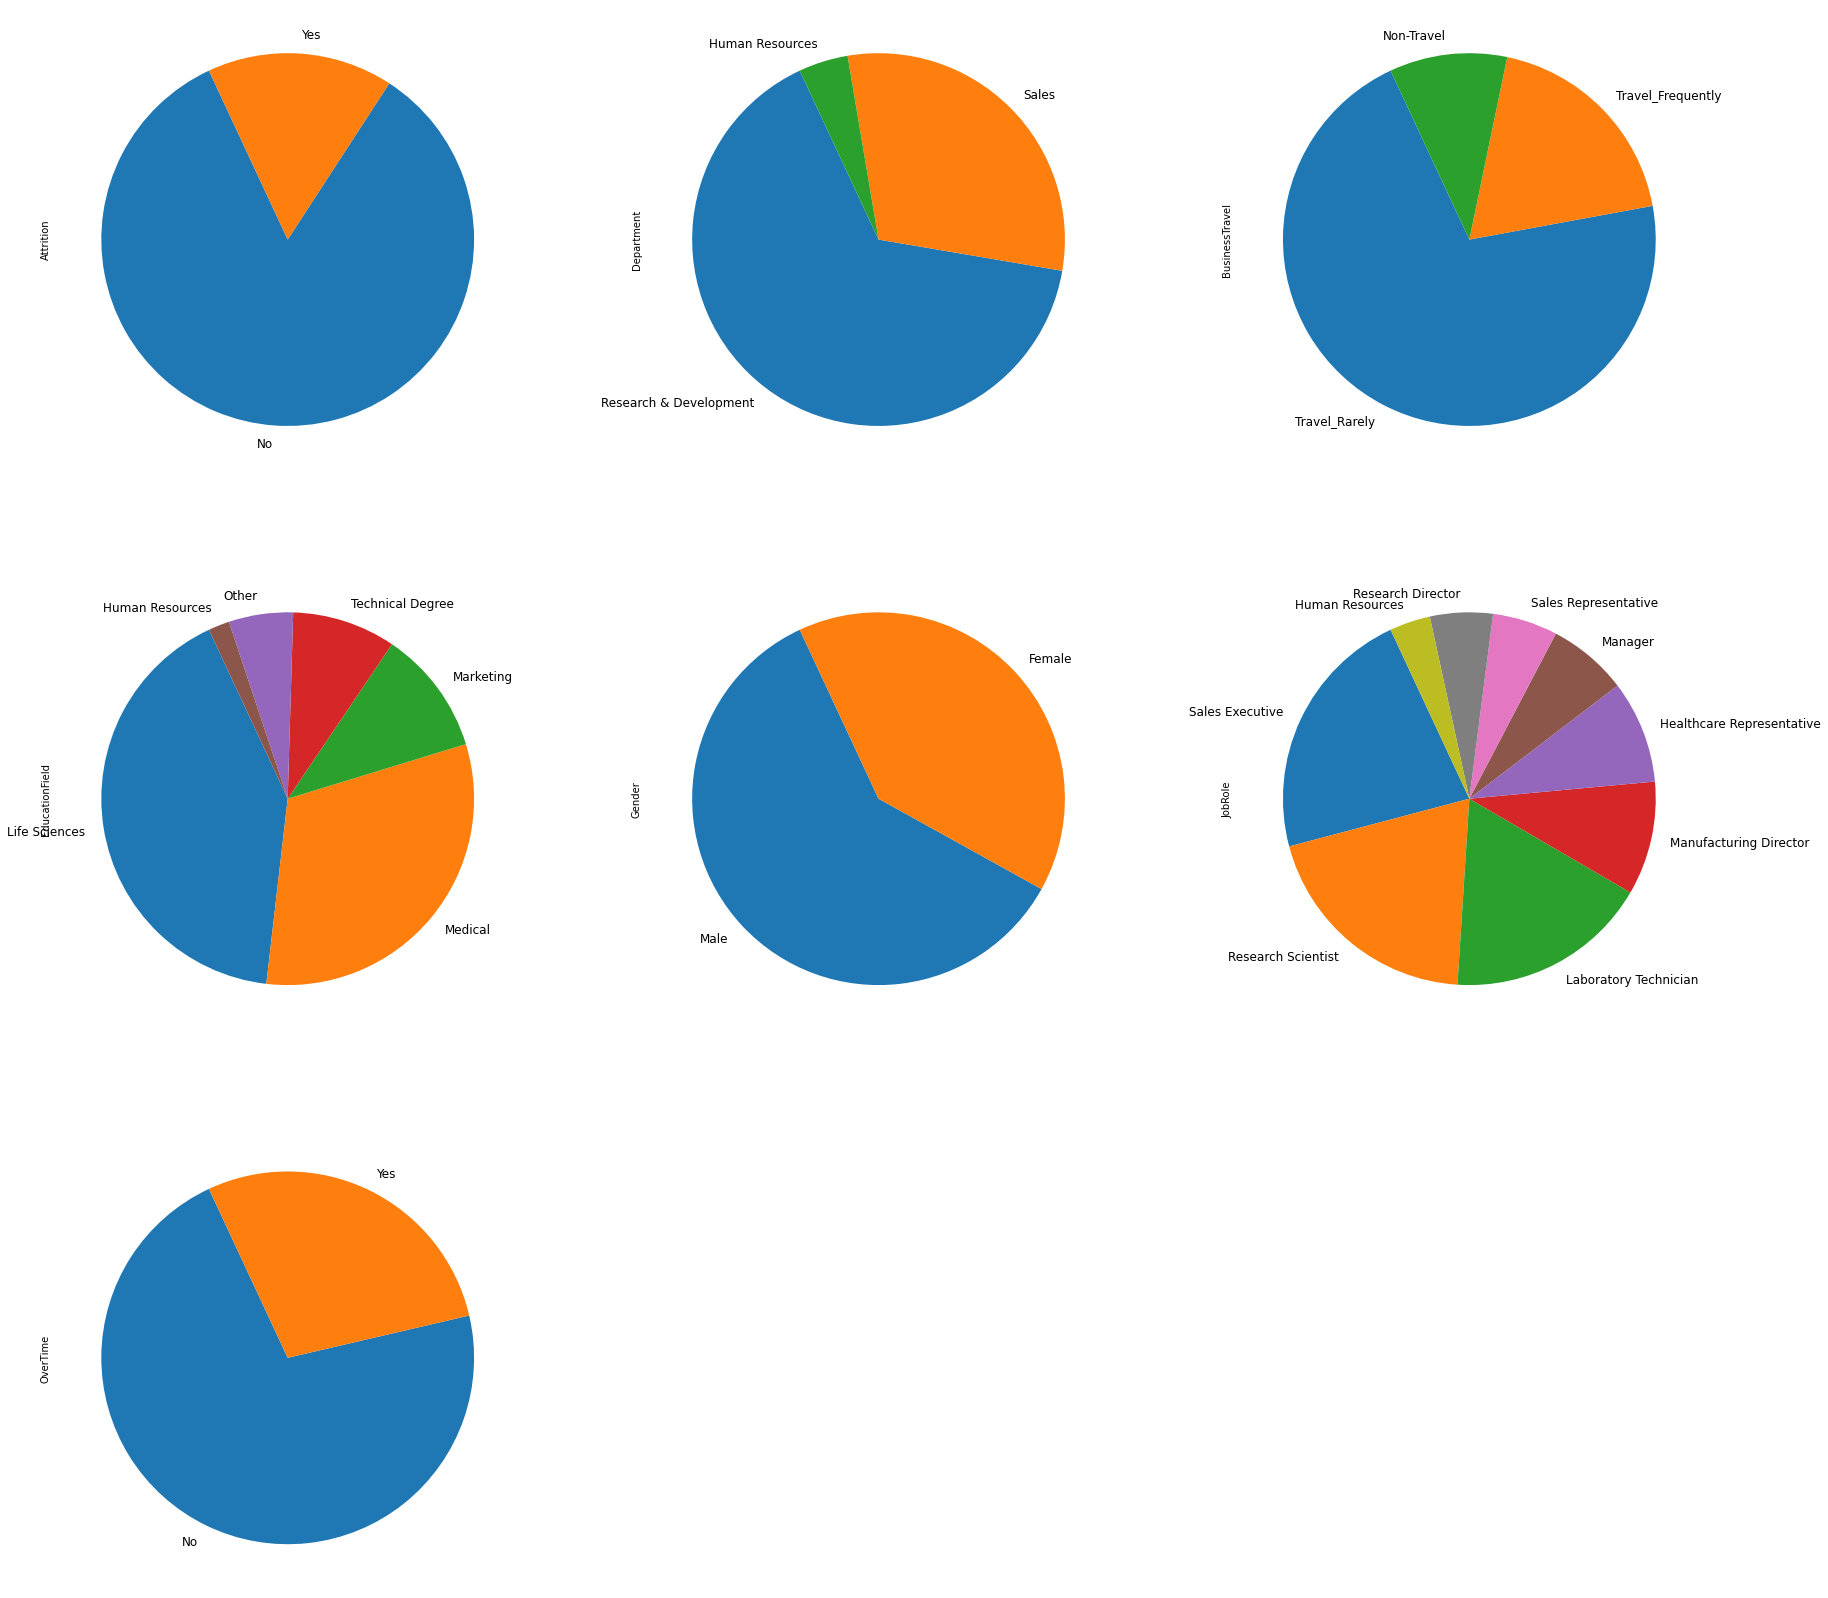

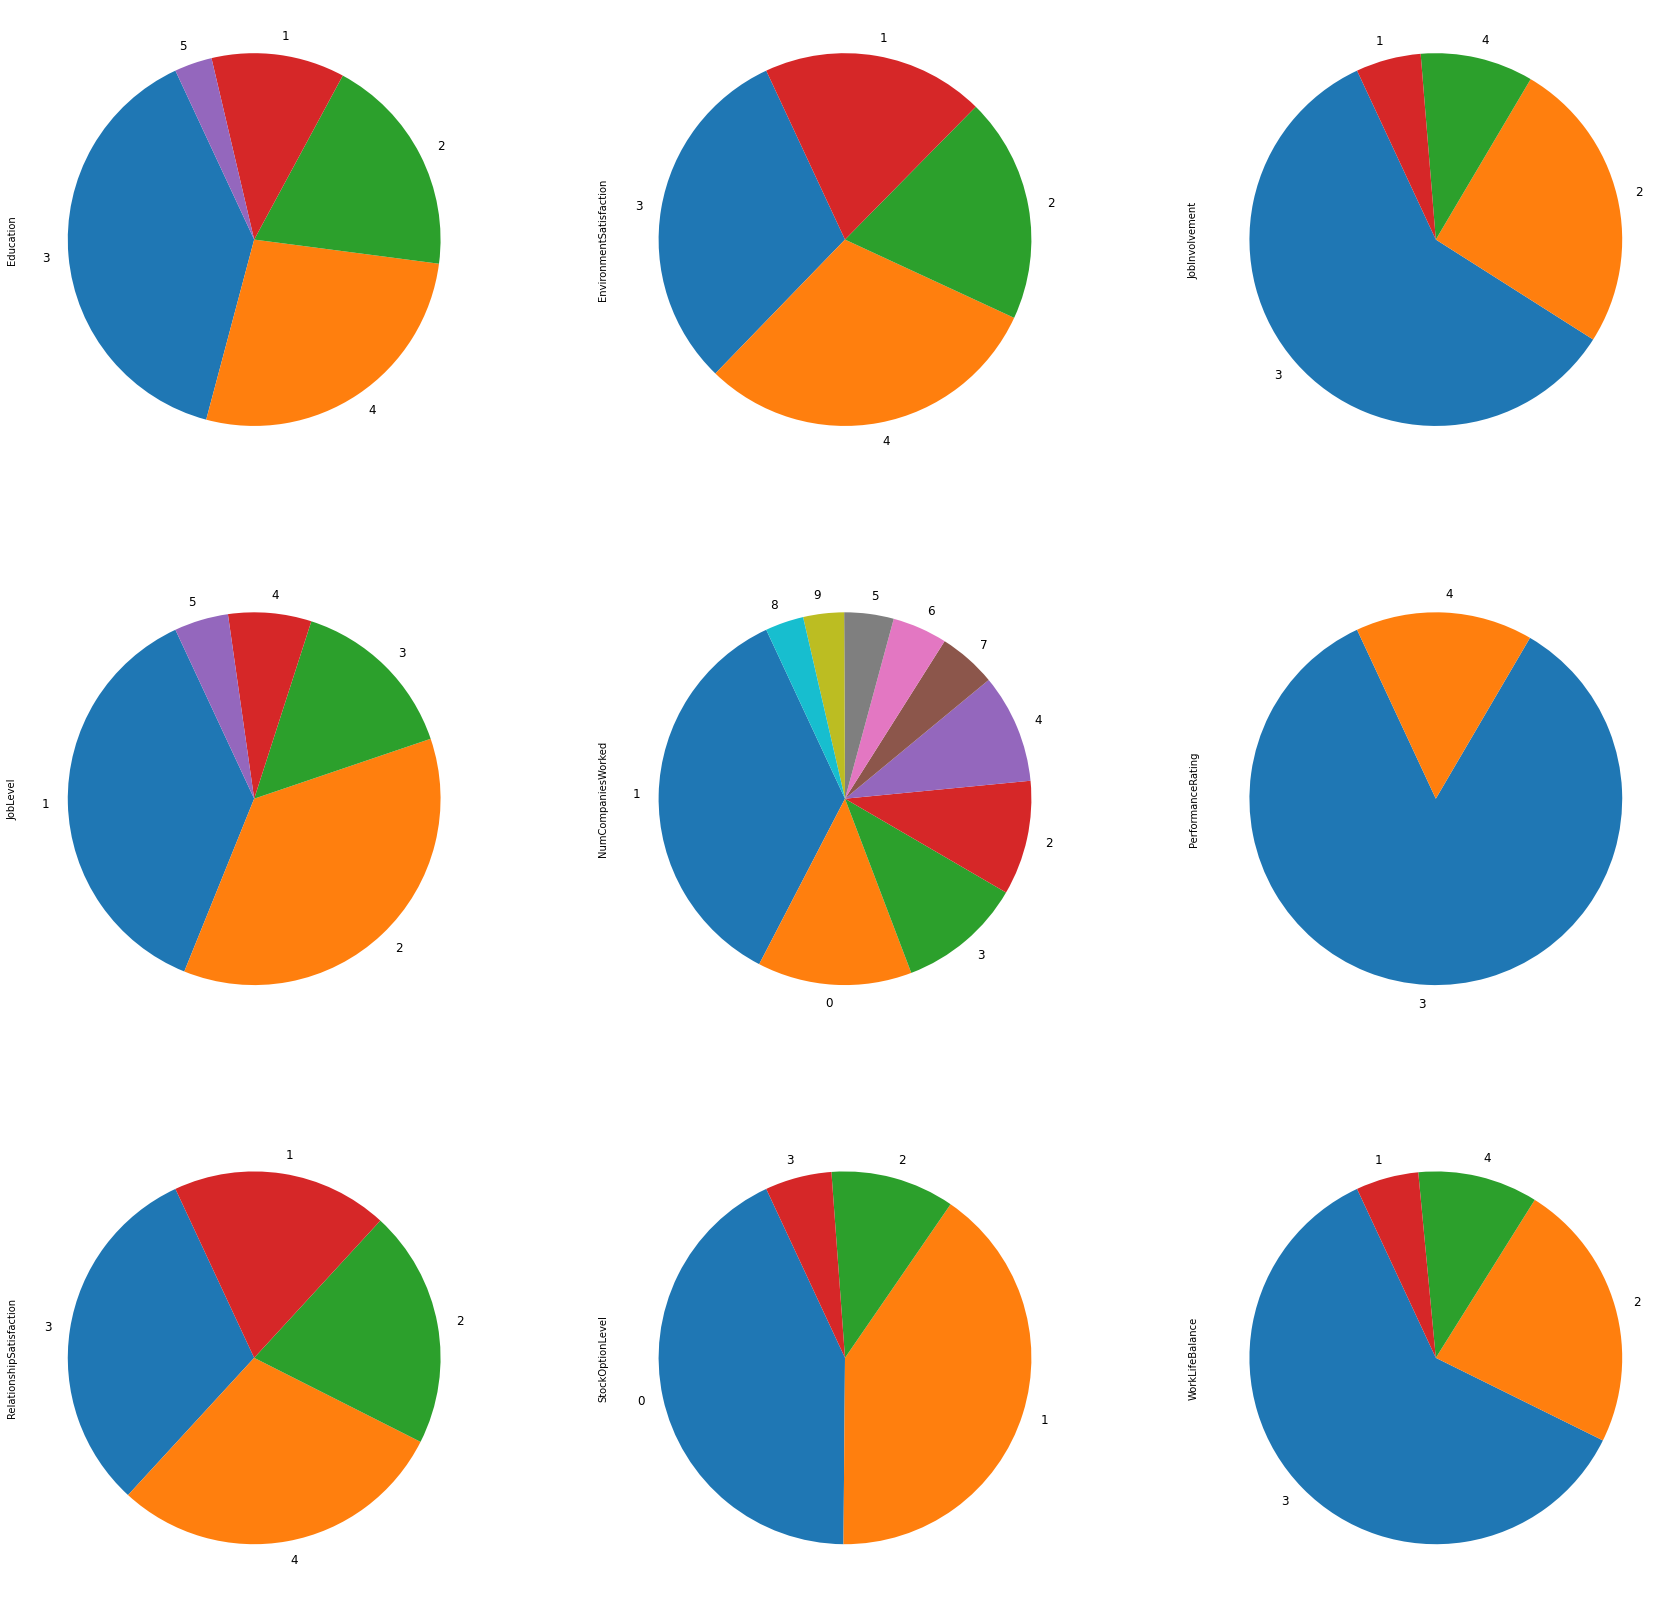

In [15]:
fig = plt.figure(figsize=(30, 60))
x = 1
for catAtt in factorColumns:
    ax = fig.add_subplot(6,3,x)
    data[catAtt].value_counts().plot(kind='pie', ax=ax, startangle=115, fontsize=12)
    x = x + 1
    
plt.show()
fig = plt.figure(figsize=(30, 60))
x = 1
for catAtt in levelColumns:
    ax = fig.add_subplot(6,3,x)
    data[catAtt].value_counts().plot(kind='pie', ax=ax, startangle=115, fontsize=12)
    x = x + 1
plt.show()

### now, lets use histograms. 

For ordinal attributes you better keep the order of the variable, but for no ordinal, 
you better order base on the value count

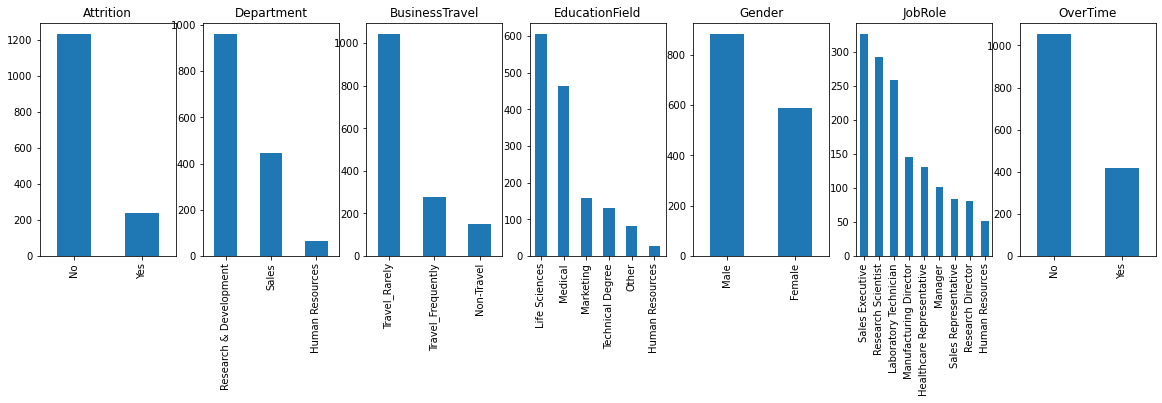

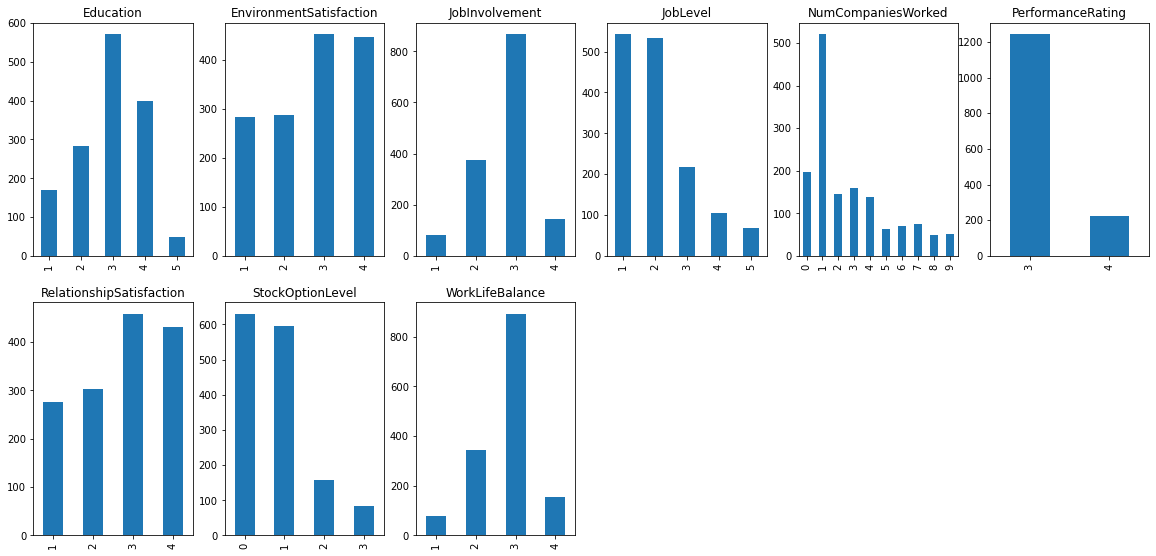

In [16]:
fig = plt.figure(figsize=(30, 100))
x = 1
for catAtt in factorColumns:
    ax = fig.add_subplot(6,7,x)
    data[catAtt].value_counts().plot(kind='bar', ax=ax, figsize=(20, 30), rot=90).set_title(catAtt)
    x = x + 1

fig = plt.figure(figsize=(30, 60))
x = 1
for catAtt in levelColumns:
    ax = fig.add_subplot(6,6,x)
    data[catAtt].value_counts(sort=False).plot(kind='bar', ax=ax, figsize=(20, 30)).set_title(catAtt)
    x = x + 1
plt.show()

## Evaluate if some variables has some classification power

### Violin plots

Let's use seaborn to make some fancy charts for numeric vs categorical data. Violin plots are a powerfull tool for this purpose.

See: https://seaborn.pydata.org/generated/seaborn.violinplot.html

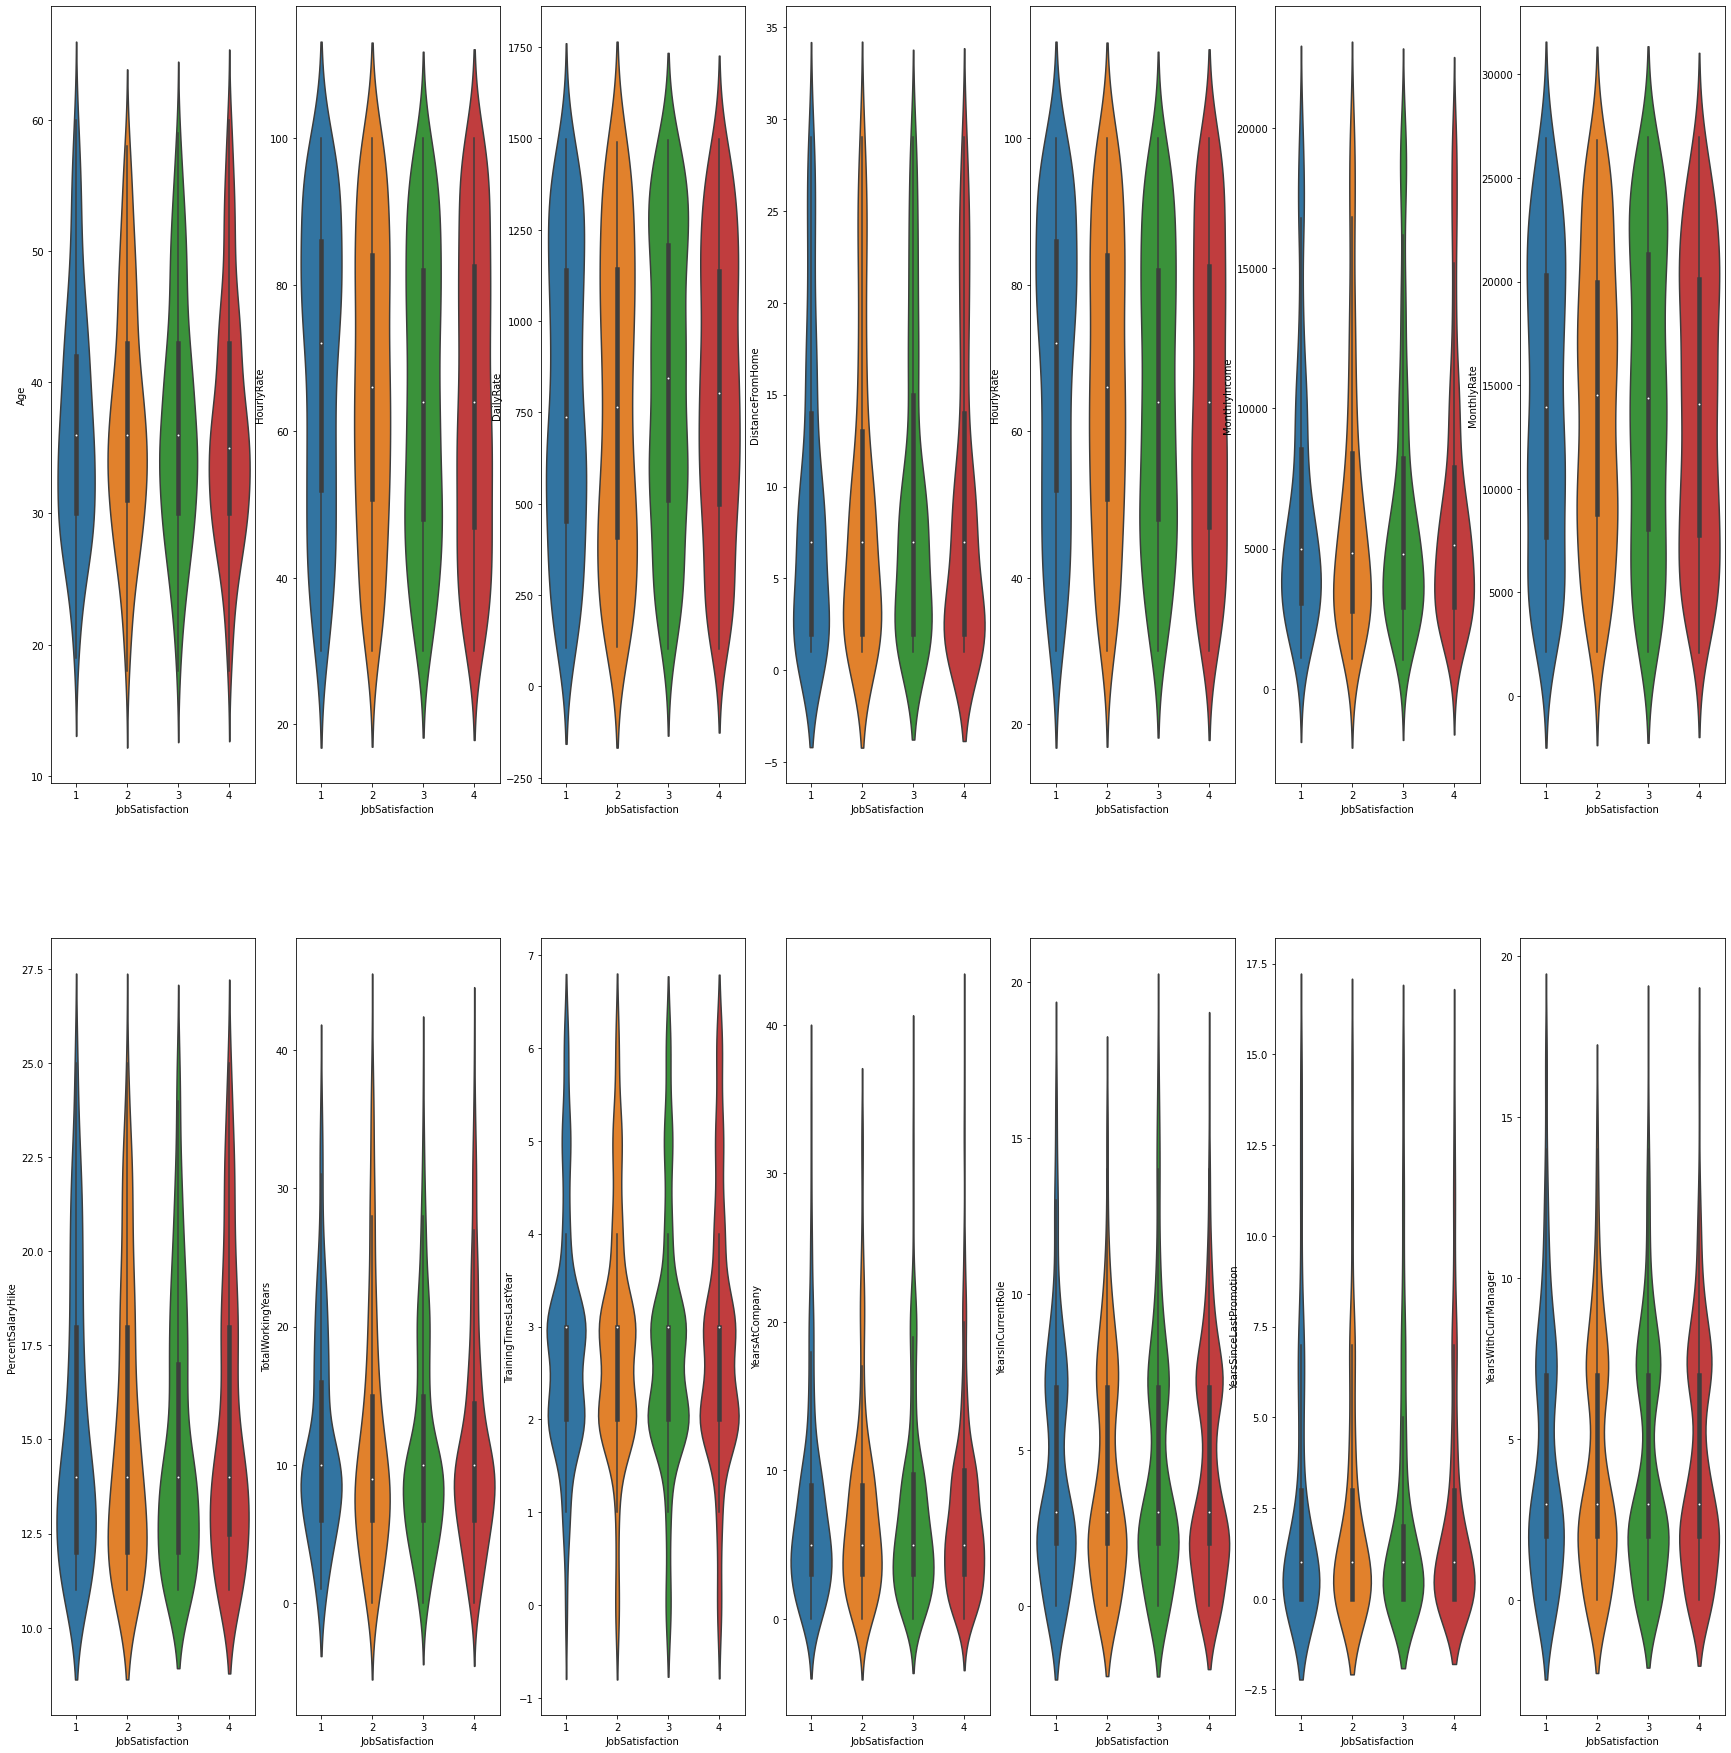

In [17]:
fig = plt.figure(figsize = (30, 100))
x = 1
for numAtt in numericColumns:
    ax = fig.add_subplot(6,7,x)
    sns.violinplot(x = "JobSatisfaction", y = numAtt, data = data)
    x = x + 1

### Box plots

Sometimes, box plots allows to display more clearly the correlation between numeric and categorical attributes

See: https://seaborn.pydata.org/tutorial/categorical.html

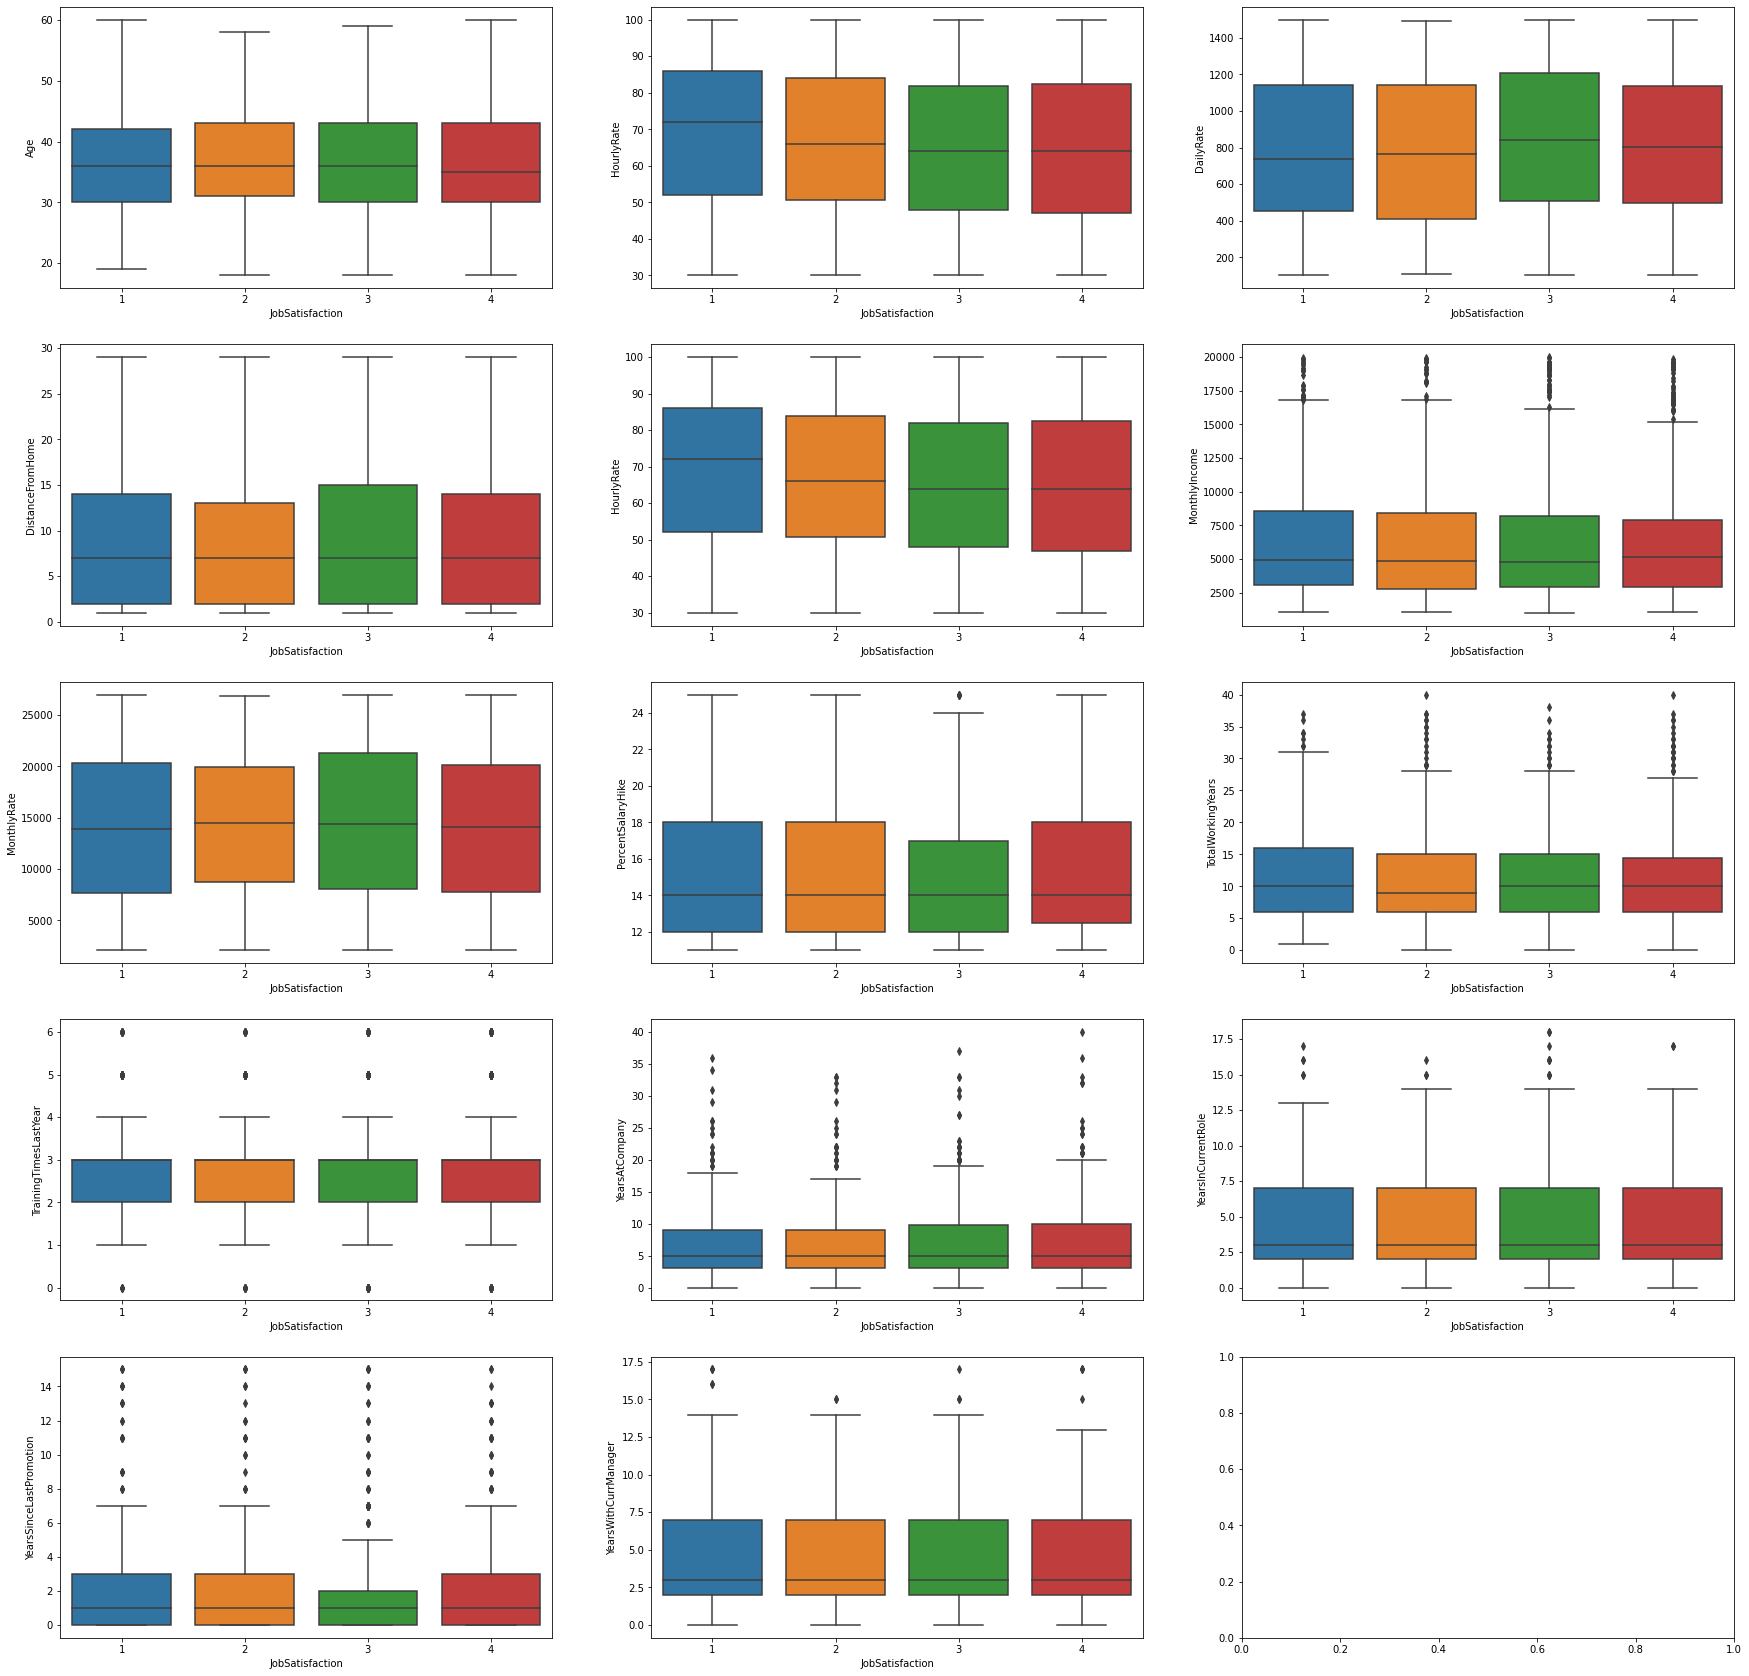

In [18]:
f, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (30,30))
axes = axes.flatten()
x = 0
for numAtt in numericColumns:
    # ax = fig.add_subplot(6,7,x)
    sns.boxplot(x = "JobSatisfaction", y = numAtt, data = data, ax=axes[x])
    x = x + 1

### Do you see something???

## Categorical vs Categorical

Now lets try to determine if some of the categorical attributes has some classification power. Let's try the count plot.

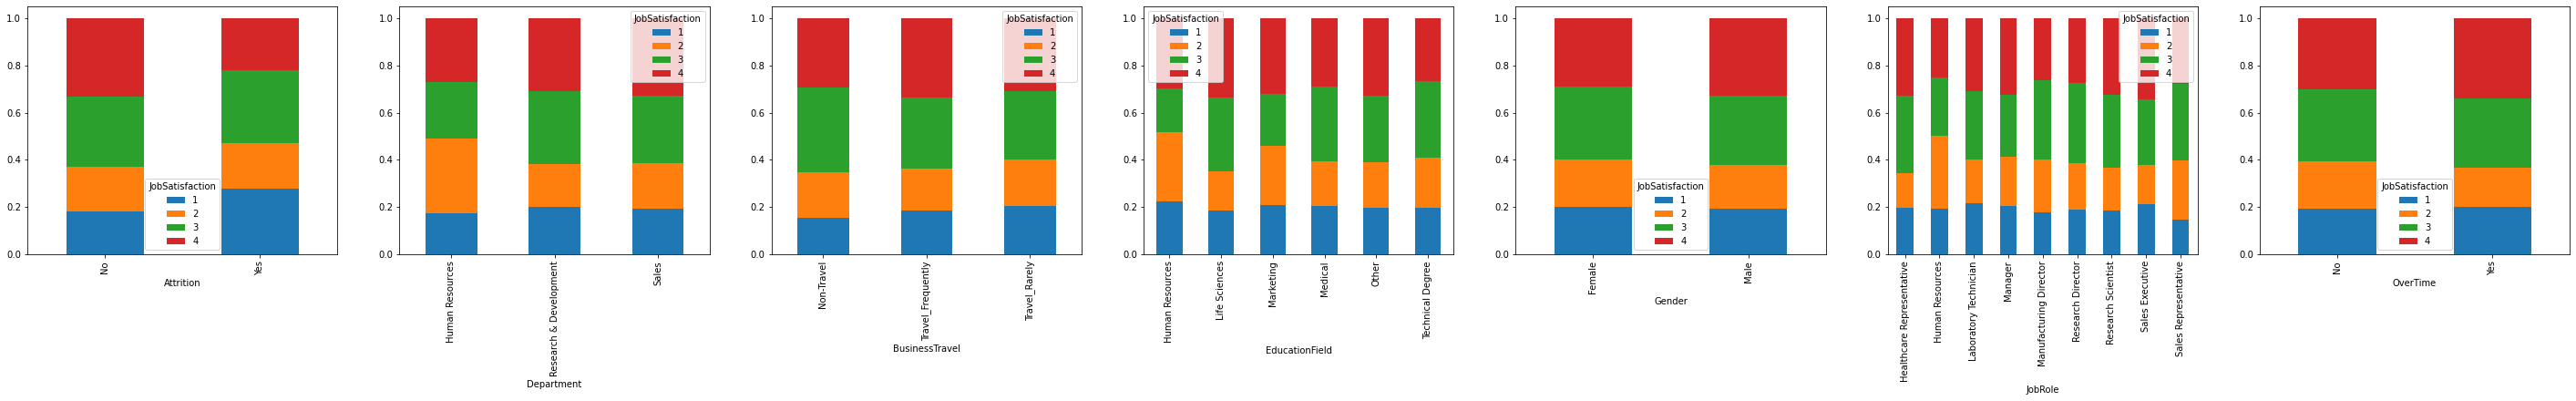

In [20]:
f, axes = plt.subplots(nrows = 1, ncols = 7)
axes = axes.flatten()
x = 0
for catAtt in factorColumns:
    cross = pd.crosstab(index=data[catAtt], 
                        columns=data["JobSatisfaction"],
                        normalize='index')
    cross.plot(kind="bar", 
                 figsize=(50,5),
                 stacked=True,
                 ax=axes[x])

    #sns.countplot(y = catAtt, hue="JobSatisfaction", data=data, ax=axes[x]);
    x = x + 1